<a href="https://colab.research.google.com/github/SheheryarQadir007/Data-Visualization/blob/main/Spotify_Reviews_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd


data=pd.read_csv('/content/drive/My Drive/Colab Datasets/DATASET.csv')

data.head()

,Review,label
0,"Great music service, the audio is high quality...",POSITIVE
1,Please ignore previous negative rating. This a...,POSITIVE
2,"This pop-up ""Get the best Spotify experience o...",NEGATIVE
3,Really buggy and terrible to use as of recently,NEGATIVE
4,Dear Spotify why do I get songs that I didn't ...,NEGATIVE


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52702 entries, 0 to 52701
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  52686 non-null  object
 1   label   52702 non-null  object
dtypes: object(2)
memory usage: 823.6+ KB


In [4]:
data.describe()

,Review,label
count,52686,52702
unique,51472,2
top,Good,NEGATIVE
freq,153,29423


In [5]:
data.isnull().sum()

,0
Review,16
label,0


In [6]:
data_cleaned=data.dropna()
print("Original dataset shape:", data.shape)
print("Cleaned dataset shape:", data_cleaned.shape)

Original dataset shape: (52702, 2)
Cleaned dataset shape: (52686, 2)


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
data.head(10)

,Review,label
0,"Great music service, the audio is high quality...",POSITIVE
1,Please ignore previous negative rating. This a...,POSITIVE
2,"This pop-up ""Get the best Spotify experience o...",NEGATIVE
3,Really buggy and terrible to use as of recently,NEGATIVE
4,Dear Spotify why do I get songs that I didn't ...,NEGATIVE
5,The player controls sometimes disappear for no...,NEGATIVE
6,I love the selection and the lyrics are provid...,POSITIVE
7,Still extremely slow when changing storage to ...,NEGATIVE
8,It's a great app and the best mp3 music app I ...,POSITIVE
9,"I'm deleting this app, for the following reaso...",NEGATIVE


In [9]:
print(data['Review'].head(10))

0    Great music service, the audio is high quality...
1    Please ignore previous negative rating. This a...
2    This pop-up "Get the best Spotify experience o...
3      Really buggy and terrible to use as of recently
4    Dear Spotify why do I get songs that I didn't ...
5    The player controls sometimes disappear for no...
6    I love the selection and the lyrics are provid...
7    Still extremely slow when changing storage to ...
8    It's a great app and the best mp3 music app I ...
9    I'm deleting this app, for the following reaso...
Name: Review, dtype: object


In [10]:
print(data['Review'].apply(type).value_counts())

Review
<class 'str'>      52686
<class 'float'>       16
Name: count, dtype: int64


In [14]:
data['Review']=data['Review'].astype(str)

In [15]:
print(data_cleaned['Review'].isnull().sum())

0


In [16]:
import re

def cleantext(text):

  text = re.sub(r'[^\w\s]', '', text)
  return text

data['Review']=data['Review'].apply(cleantext)

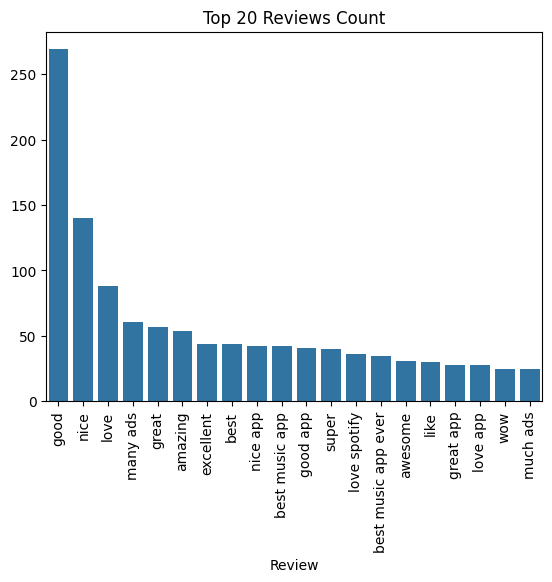

In [38]:
review_counts=data['Review'].value_counts()
top_reviews = review_counts.head(20)
sns.barplot(x=top_reviews.index, y=top_reviews.values)
plt.title('Top 20 Reviews Count')
plt.xticks(rotation=90)
plt.show()

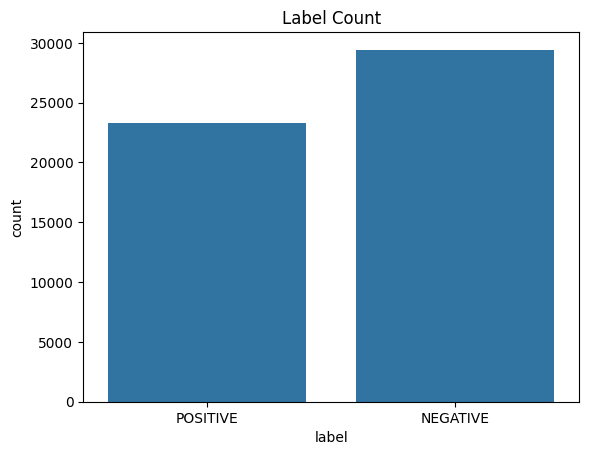

In [18]:
sns.countplot(x='label', data=data)
plt.title('Label Count')
plt.show()

In [19]:
pip install nltk

In [20]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [21]:
def pre_process_text(text):
  text=text.lower()
  tokens=word_tokenize(text)
  filtered_tokens=[word for word in tokens if word not in stopwords.words('english')]
  return ' '.join(filtered_tokens)

data['Review']=data['Review'].apply(pre_process_text)


In [22]:
data.head()

,Review,label
0,great music service audio high quality app eas...,POSITIVE
1,please ignore previous negative rating app sup...,POSITIVE
2,popup get best spotify experience android 12 a...,NEGATIVE
3,really buggy terrible use recently,NEGATIVE
4,dear spotify get songs didnt put playlist shuf...,NEGATIVE


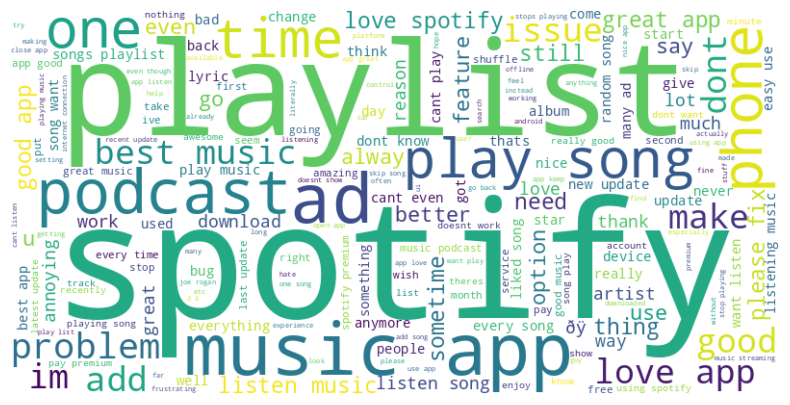

In [23]:
from wordcloud import WordCloud
text=' '.join(data['Review'])
wordcloud=WordCloud(width=800,height=400,background_color='white').generate(text)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [24]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52702 entries, 0 to 52701
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  52702 non-null  object
 1   label   52702 non-null  object
dtypes: object(2)
memory usage: 823.6+ KB


,Review,label
count,52702,52702
unique,50663,2
top,good,NEGATIVE
freq,269,29423


In [25]:
data['Review Length'] = data['Review'].str.split().str.len()  # Calculate review lengths

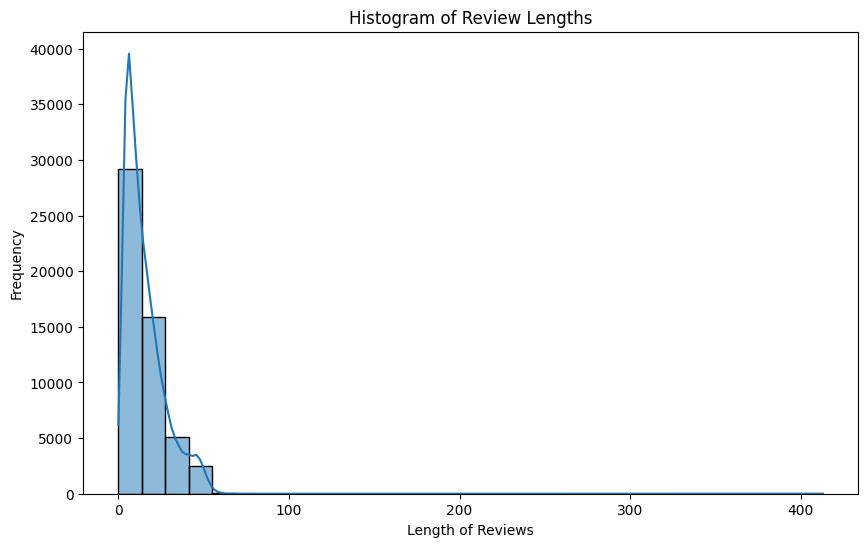

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(data['Review Length'], bins=30, kde=True)  # kde=True adds a kernel density estimate
plt.title('Histogram of Review Lengths')
plt.xlabel('Length of Reviews')
plt.ylabel('Frequency')
plt.show()



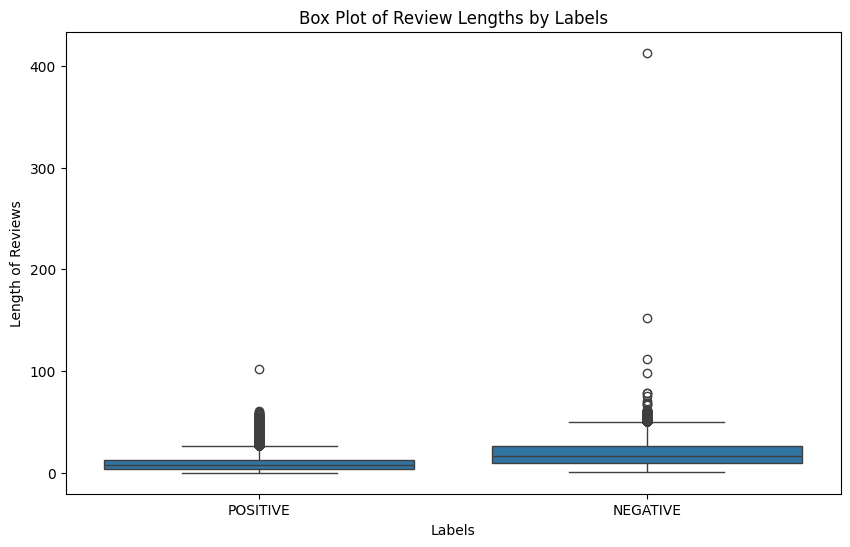

In [27]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='label', y='Review Length', data=data)
plt.title('Box Plot of Review Lengths by Labels')
plt.xlabel('Labels')
plt.ylabel('Length of Reviews')
plt.show()

Sentiment
Positive    35113
Negative    10495
Neutral      7094
Name: count, dtype: int64


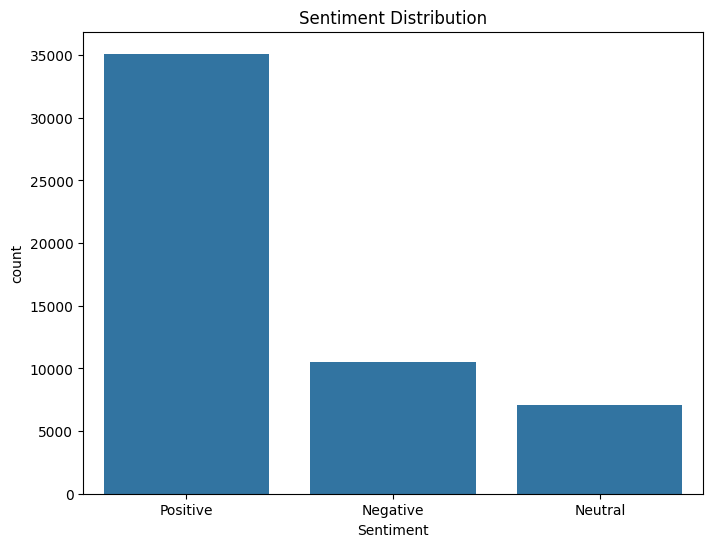

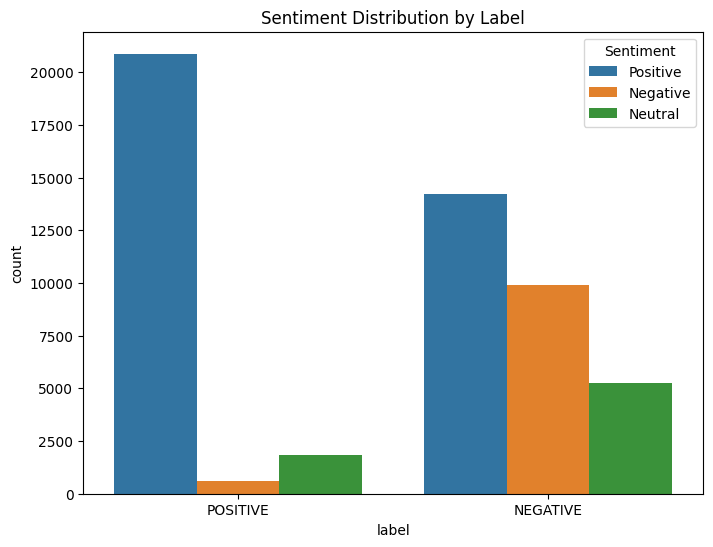

In [28]:
# prompt: sentiment analysis

from textblob import TextBlob

# Function to perform sentiment analysis
def analyze_sentiment(text):
  analysis = TextBlob(text)
  if analysis.sentiment.polarity > 0:
    return 'Positive'
  elif analysis.sentiment.polarity == 0:
    return 'Neutral'
  else:
    return 'Negative'

# Apply sentiment analysis to the 'Review' column
data['Sentiment'] = data['Review'].apply(analyze_sentiment)

# Analyze the distribution of sentiment
sentiment_counts = data['Sentiment'].value_counts()
print(sentiment_counts)

# Visualize sentiment distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Sentiment', data=data)
plt.title('Sentiment Distribution')
plt.show()

# You can also analyze sentiment by label:
plt.figure(figsize=(8, 6))
sns.countplot(x='label', hue='Sentiment', data=data)
plt.title('Sentiment Distribution by Label')
plt.show()


In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(data['Review'])
print(X.shape)

(52702, 5000)


In [32]:
y = data['label']

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training Data Shape", X_train.shape)
print("Testing Data Shape", X_test.shape)

Training Data Shape (42161, 5000)
Testing Data Shape (10541, 5000)


In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model=LogisticRegression (max_iter=1000)

In [35]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [36]:
y_pred=model.predict(X_test)

In [37]:
accuracy=accuracy_score(y_test,y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

confusion_mat=confusion_matrix(y_test,y_pred)
print("Confusion Matrix")
print(confusion_mat)

Accuracy: 0.88
Classification Report:
              precision    recall  f1-score   support

    NEGATIVE       0.89      0.90      0.90      5906
    POSITIVE       0.87      0.86      0.87      4635

    accuracy                           0.88     10541
   macro avg       0.88      0.88      0.88     10541
weighted avg       0.88      0.88      0.88     10541

Confusion Matrix
[[5327  579]
 [ 637 3998]]


In [40]:
from sklearn.ensemble import RandomForestClassifier

model=RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred))
confusion_mat=confusion_matrix(y_test,y_pred)
print("Confusion Matrix:")
print(confusion_mat)

Accuracy: 0.86
Random Forest Classification Report:
              precision    recall  f1-score   support

    NEGATIVE       0.85      0.90      0.88      5906
    POSITIVE       0.87      0.80      0.83      4635

    accuracy                           0.86     10541
   macro avg       0.86      0.85      0.86     10541
weighted avg       0.86      0.86      0.86     10541

Confusion Matrix:
[[5341  565]
 [ 910 3725]]
